# تمرین سوم درس هوش محاسباتی

## امیرمهدی نیکوکاران

In [26]:
from __future__ import print_function

# *-* coding: utf-8 *-*

from matplotlib import pyplot as plt
from HodaDatasetReader import read_hoda_dataset

import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

batch_size = 128
num_classes = 10
epochs = 5

print('Reading train dataset (Train 60000.cdb)...')
x_train, y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

print('Reading test dataset (Test 20000.cdb)...')
x_test, y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

print()

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy', f1_m, precision_m, recall_m])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test f1_score:', score[2])
print('Test precision:', score[3])
print('Test recall:', score[4])


Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 11s 199us/step - loss: 0.1337 - acc: 0.9613 - f1_m: 0.9599 - precision_m: 0.9685 - recall_m: 0.9526 - val_loss: 0.0705 - val_acc: 0.9783 - val_f1_m: 0.9790 - val_precision_m: 0.9811 - val_recall_m: 0.9770
Epoch 2/5
54000/54000 [==============================] - 9s 161us/step - loss: 0.0465 - acc: 0.9868 - f1_m: 0.9870 - precision_m: 0.9884

In [27]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred_bool))

20000/20000 [==============================] - 1s 58us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2000
           1       0.98      1.00      0.99      2000
           2       0.96      0.95      0.96      2000
           3       0.93      0.97      0.95      2000
           4       0.98      0.96      0.97      2000
           5       0.98      0.99      0.98      2000
           6       0.99      0.97      0.98      2000
           7       0.99      0.99      0.99      2000
           8       0.99      0.98      0.99      2000
           9       0.97      0.98      0.98      2000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



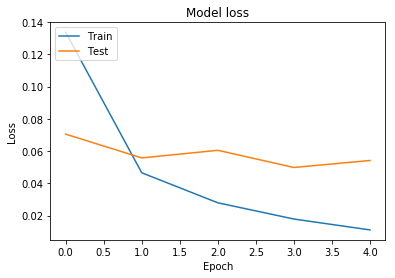

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
history.history['loss']

[0.1443630649317056, 0.05708786968987745]

In [8]:
history.history['val_loss']

[0.09365243642739951, 0.08729164163870737]

In [30]:
inp = np.linspace(-2,2,41)
out = inp*inp*inp

In [31]:
inp

array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
       -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [32]:
out

array([-8.000e+00, -6.859e+00, -5.832e+00, -4.913e+00, -4.096e+00,
       -3.375e+00, -2.744e+00, -2.197e+00, -1.728e+00, -1.331e+00,
       -1.000e+00, -7.290e-01, -5.120e-01, -3.430e-01, -2.160e-01,
       -1.250e-01, -6.400e-02, -2.700e-02, -8.000e-03, -1.000e-03,
        0.000e+00,  1.000e-03,  8.000e-03,  2.700e-02,  6.400e-02,
        1.250e-01,  2.160e-01,  3.430e-01,  5.120e-01,  7.290e-01,
        1.000e+00,  1.331e+00,  1.728e+00,  2.197e+00,  2.744e+00,
        3.375e+00,  4.096e+00,  4.913e+00,  5.832e+00,  6.859e+00,
        8.000e+00])

In [33]:
inp.shape

(41,)

In [34]:
out.shape

(41,)

In [30]:
from __future__ import print_function

# *-* coding: utf-8 *-*

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Layer, Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import SGD

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


epochs = 80

inp = np.linspace(-2,2,41)
out = inp*inp*inp

model = Sequential()
model.add(Dense(41, input_dim=1, activation='tanh'))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

history = model.fit(inp, out,
                    epochs=epochs,
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 41)                82        
_________________________________________________________________
rbf_layer_11 (RBFLayer)      (None, 10)                410       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 503
Trainable params: 503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
41/41 [==============================] - 0s 9ms/step - loss: 10.9793 - acc: 0.0000e+00
Epoch 2/80
41/41 [==============================] - 0s 268us/step - loss: 10.2940 - acc: 0.0244
Epoch 3/80
41/41 [==============================] - 0s 146us/step - loss: 9.8805 - acc: 0.0244
Epoch 4/80
41/41 [==============================] - 0s 219us/step - loss: 8.9321 - acc: 0.0488
Epoch 5/80
41/41 [======

In [18]:
inp.shape

(41,)

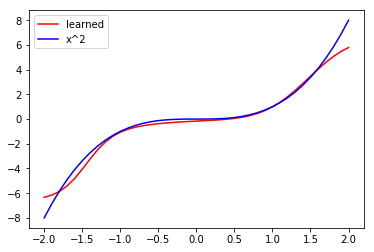

In [31]:
res = model.predict(inp)
r = plt.figure(1)
plt.plot(inp, res, 'r', label="learned")
plt.plot(inp, out, 'b', label="x^2")
plt.legend()
r.show()

In [15]:
ll

[array([1.00000000e+00, 9.90049834e-01, 9.60789439e-01, 9.13931185e-01,
        8.52143789e-01, 7.78800783e-01, 6.97676326e-01, 6.12626394e-01,
        5.27292424e-01, 4.44858066e-01, 3.67879441e-01, 2.98197279e-01,
        2.36927759e-01, 1.84519524e-01, 1.40858421e-01, 1.05399225e-01,
        7.73047404e-02, 5.55762126e-02, 3.91638951e-02, 2.70518469e-02,
        1.83156389e-02, 1.21551783e-02, 7.90705405e-03, 5.04176026e-03,
        3.15111160e-03, 1.93045414e-03, 1.15922917e-03, 6.82328053e-04,
        3.93669041e-04, 2.22629857e-04, 1.23409804e-04, 6.70548243e-05,
        3.57128496e-05, 1.86437423e-05, 9.54016287e-06, 4.78511739e-06,
        2.35257520e-06, 1.13372714e-06, 5.35534780e-07, 2.47959602e-07,
        1.12535175e-07]),
 array([9.90049834e-01, 1.00000000e+00, 9.90049834e-01, 9.60789439e-01,
        9.13931185e-01, 8.52143789e-01, 7.78800783e-01, 6.97676326e-01,
        6.12626394e-01, 5.27292424e-01, 4.44858066e-01, 3.67879441e-01,
        2.98197279e-01, 2.36927759e-01